In [1]:
import pandas as pd
import seaborn as sea
import statistics as est

In [2]:
dataset = pd.read_csv('Churn.csv', delimiter=';', encoding='utf-8')

In [3]:
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
dataset.shape

(999, 12)

In [1]:
dataset.columns = ['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo', 'Produtos', 'TemCartCredito', 'Ativo', 'Salario', 'Saiu',]

NameError: name 'dataset' is not defined

In [6]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

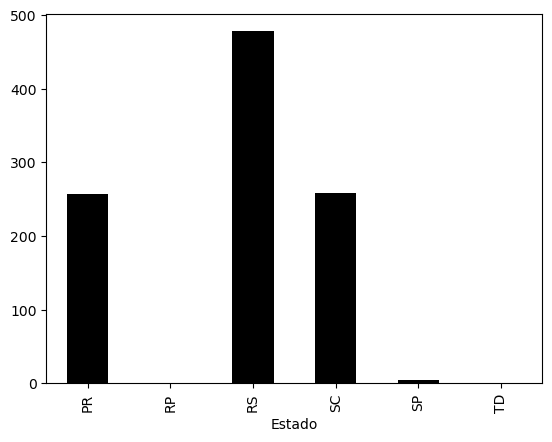

In [8]:
agrupado.plot.bar(x = 50, y = 50, color = "black")

In [9]:
group_idade = dataset.groupby(['Genero']).size()
group_idade

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Genero'>

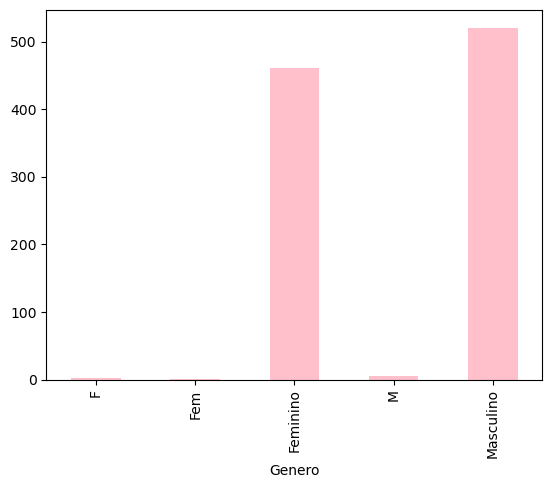

In [10]:
group_idade.plot.bar(color = 'pink')

In [11]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'score')

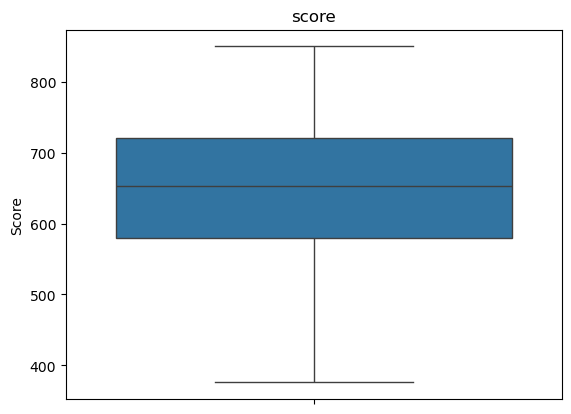

In [12]:
sea.boxplot(dataset['Score']).set_title('score')

AttributeError: 'FacetGrid' object has no attribute 'set_title'

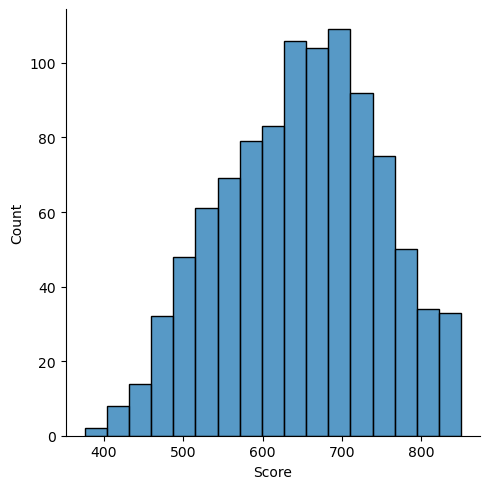

In [14]:
sea.displot(dataset['Score']).set_title('score')

In [15]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'aaa')

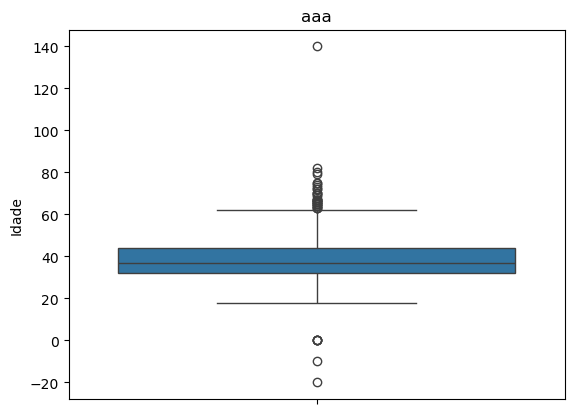

In [16]:
sea.boxplot(dataset['Idade']).set_title('aaa')

Text(0.5, 1.0, 'idadee')

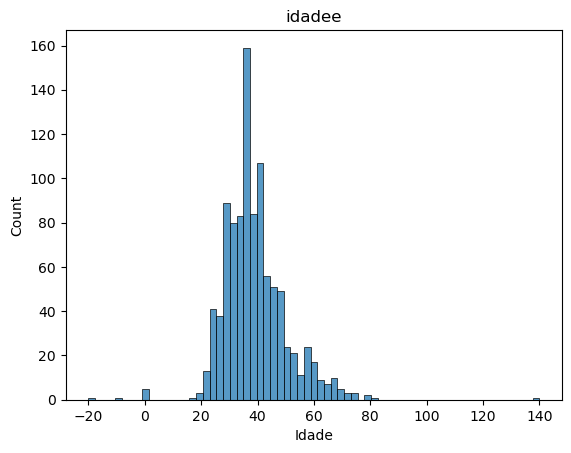

In [17]:
sea.histplot(dataset['Idade']).set_title('idadee')

In [18]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

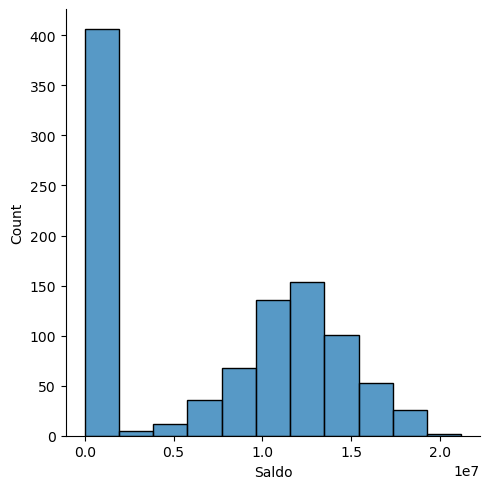

In [19]:
sea.displot(dataset['Saldo']).set_titles('aaai')

<AxesSubplot:ylabel='Salario'>

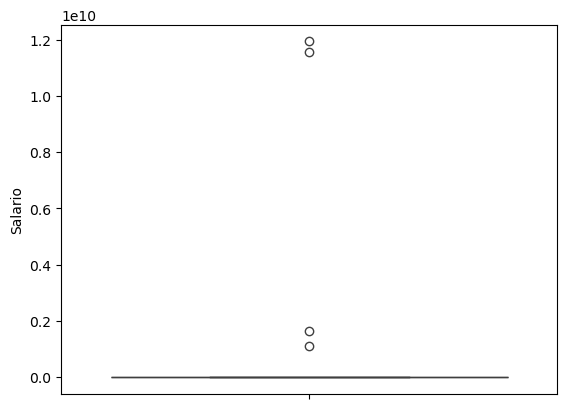

In [20]:
sea.boxplot(dataset['Salario'])

In [21]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [22]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [23]:
mediana = est.median(dataset['Salario'])
mediana

70518.0

In [24]:
dataset['Salario'].fillna(mediana, inplace=True)

In [25]:
gengroup = dataset.groupby(['Genero']).size()
gengroup

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [26]:
dataset['Genero'].isnull().sum()

8

In [27]:
dataset['Genero'].fillna('Masculino', inplace=True)

In [28]:
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['F', 'Fem']), 'Genero'] = 'Feminino'

In [29]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [30]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [31]:
mediana =  est.median(dataset['Idade'])
mediana

37

In [32]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120) ] = mediana

AxesSubplot(0.125,0.11;0.775x0.77)


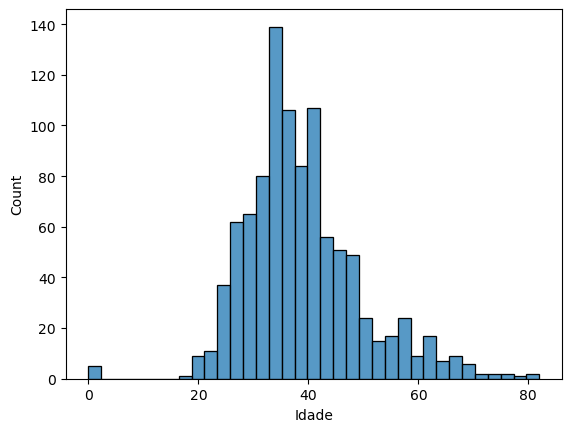

In [33]:
print(sea.histplot(dataset['Idade']))

In [37]:
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [36]:
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)

In [42]:
dataset.groupby(['Estado']).size()

Estado
PR    257
RS    480
SC    258
dtype: int64

In [41]:
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'

In [43]:
desv = est.stdev(dataset['Salario'])
desv

529784177.60963464

In [49]:
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [47]:
mediana = est.median(dataset['Salario'])
mediana

8641028.0

In [48]:
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana

In [50]:
dataset.head

<bound method NDFrame.head of        Id  Score Estado     Genero  Idade  Patrimonio     Saldo  Produtos  \
0       1    619     RS   Feminino     42           2         0         1   
1       2    608     SC   Feminino     41           1   8380786         1   
2       3    502     RS   Feminino     42           8   1596608         3   
3       4    699     RS   Feminino     39           1         0         2   
4       5    850     SC   Feminino     43           2  12551082         1   
..    ...    ...    ...        ...    ...         ...       ...       ...   
994   996    838     SC  Masculino     43           9  12310588         2   
995   997    610     SC  Masculino     29           9         0         3   
996   998    811     SC  Masculino     44           3         0         2   
997   999    587     SC  Masculino     62           7  12128627         1   
998  1000    811     PR   Feminino     28           4  16773882         2   

     TemCartCredito  Ativo     Salario  Saiu 

In [51]:
dataset.shape

(995, 12)